# Boilerplate

In [1]:
import pandas as pd 
import pandasql as ps
import matplotlib.pyplot as plt 
import matplotlib as mpl
plt.style.use('seaborn-white')
import numpy as np
import seaborn as sns
import scipy.stats as stats
import statsmodels.stats.api as sms
from plotnine import *
import plotnine as pn
import math

from IPython.display import display
from IPython.display import Markdown as md
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

def f():
    pd.set_option('display.max_columns', None)
    pd.set_option('display.max_rows', None)
    
def nf():
    pd.set_option('display.max_columns', None)
    pd.set_option('display.max_rows', 4)

import warnings
warnings.filterwarnings('ignore')

def dp(df, r = 5, c = None):
    from IPython.display import display
    with pd.option_context('display.max_rows', 4, 'display.max_columns', None):
        display(df)

def fg(w = 6, h = 4, dpi = 120):
    plt.rcParams['figure.figsize'] = (w,h)
    plt.rcParams['figure.dpi'] = dpi
fg()

%load_ext autoreload
%autoreload 2


# Load data

In [2]:
import numpy as np
import pandas as pd
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

import matplotlib.pyplot as plt
from matplotlib import rcParams
from cycler import cycler

rcParams['figure.figsize'] = 18, 5
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False
rcParams['axes.prop_cycle'] = cycler(color=['#365977'])
rcParams['lines.linewidth'] = 2.5

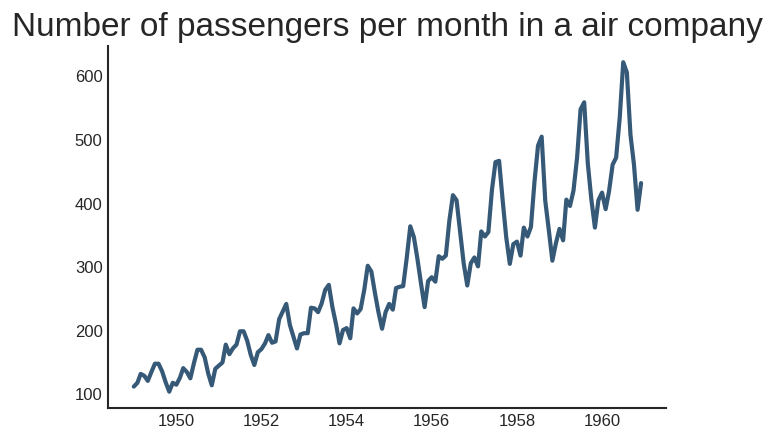

In [114]:
# Dataset
passengers = pd.read_csv('data/AirPassengers.csv', index_col='Month', parse_dates=True)
passengers = passengers['#Passengers']
# Visualize
plt.title('Number of passengers per month in a air company', size=20)
plt.plot(df);

# Simple example stationary first order

- https://www.youtube.com/watch?v=oY-j2Wof51c&t=18s

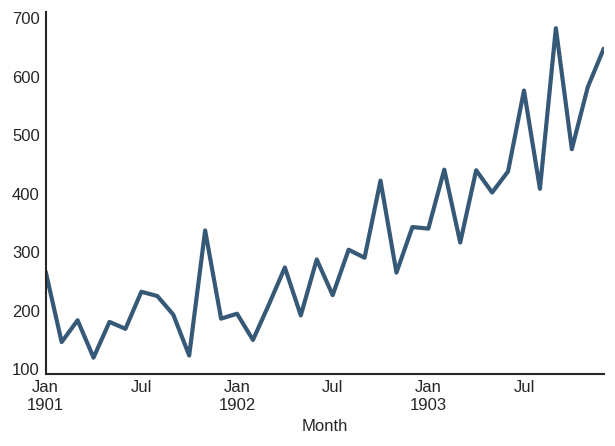

In [115]:
from pandas import read_csv
from pandas import datetime
 
def parser(x):
	return datetime.strptime('190'+x, '%Y-%m')
 
shampoo = read_csv('data/shampoo.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
fg(w = 6, h = 4)
shampoo.plot();
plt.show();

In [116]:
def difference(dataset:'pd.Series', interval=1) -> 'pd.Series':
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return pd.Series(diff)

In [117]:
z = difference(shampoo, interval = 1)

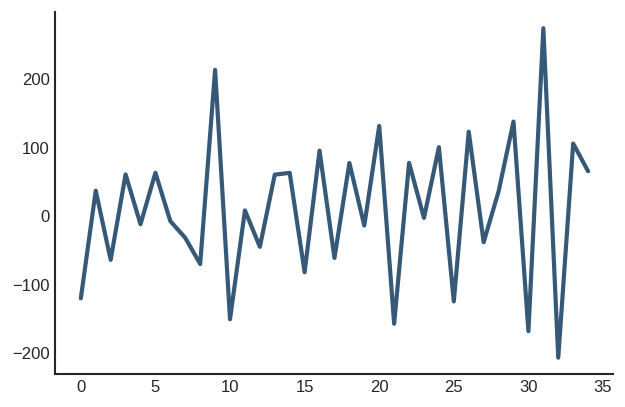

In [118]:
plt.plot(z);

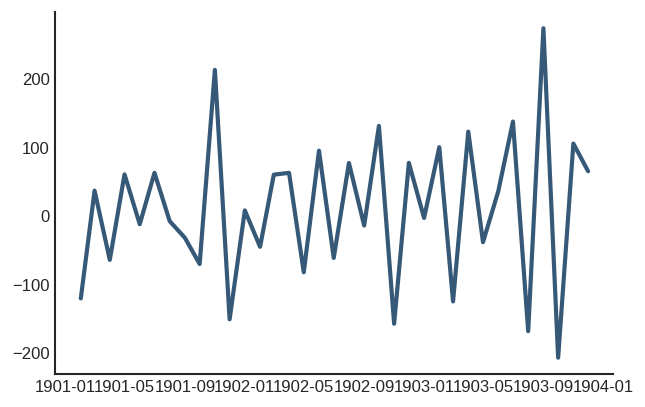

In [119]:
plt.plot(shampoo.diff(1))

## Coming back to autocorrelation
https://towardsdatascience.com/time-series-from-scratch-autocorrelation-and-partial-autocorrelation-explained-1dd641e3076f

In [125]:
dfpassengers = pd.DataFrame(passengers)

In [126]:
def difference(dataset:'pd.Series', interval=1) -> 'pd.Series':
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return pd.Series(diff)

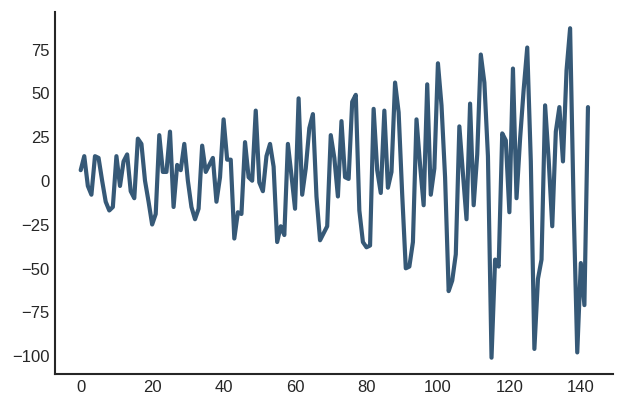

In [133]:
plt.plot(difference(passengers,1))

In [244]:
def diffdf(df:"pd.DataFrame", var:str, interval:int = 1) -> "pd.DataFrame":
    # internal func
    series = df[var]

    diff = list()
    for i in range(interval, len(series)):
        value = series[i] - series[i - interval]
        diff.append(value)

    diff = pd.Series(diff)

    # new dataframe with only relevant rows to plot
    newdf = df[interval:]

    # final dataframea
    newdf[f'diff_{interval}'] = diff.values

    newdf

    return newdf

In [276]:
dfnew = diffdf(dfpassengers, '#Passengers')

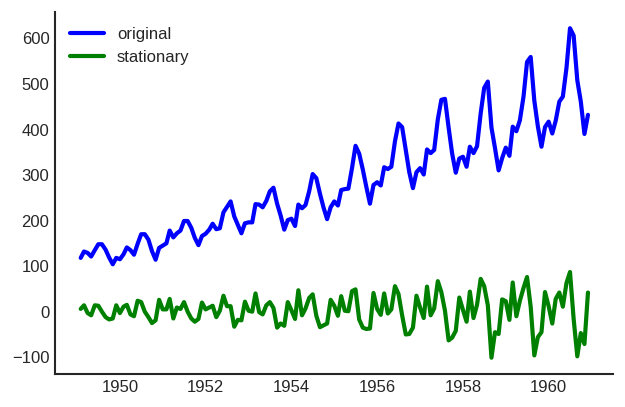

In [277]:
plt.plot(dfnew['#Passengers'], color = 'blue', label = 'original');
plt.plot(dfnew['diff_1'], color = 'green', label = 'stationary');
plt.legend();
plt.show();

## Manual autocorrelation

In [259]:
np.corrcoef(dfnew['#Passengers'],dfnew['diff_1'])[0][1]

0.13650450782199608

In [263]:
# def myacf(df:"pd.DataFrame", var1:str, laginit:int, laginterval:int):
#     acfs = list()
#     lags = list()
#     for lag in range(laginit, df.shape[0],laginterval):
#         # first lag var
#         newdf = diffdf(df, var = var1, interval = lag)
#         lags.append(lag)
#         lastvar = newdf.columns[-1]
#         acfs.append(np.corrcoef(newdf[var1],newdf[lastvar])[0][1])
        
#     return pd.DataFrame({'lag':lags[:-laginit],'acf':acfs[:-laginit]})

## acf do statsmodels

In [279]:
acf_stat = acf(passengers)

In [280]:
acf_stat

array([1.        , 0.94804734, 0.87557484, 0.80668116, 0.75262542,
       0.71376997, 0.6817336 , 0.66290439, 0.65561048, 0.67094833,
       0.70271992, 0.74324019, 0.76039504, 0.71266087, 0.64634228,
       0.58592342, 0.53795519, 0.49974753, 0.46873401, 0.44987066,
       0.4416288 , 0.45722376])

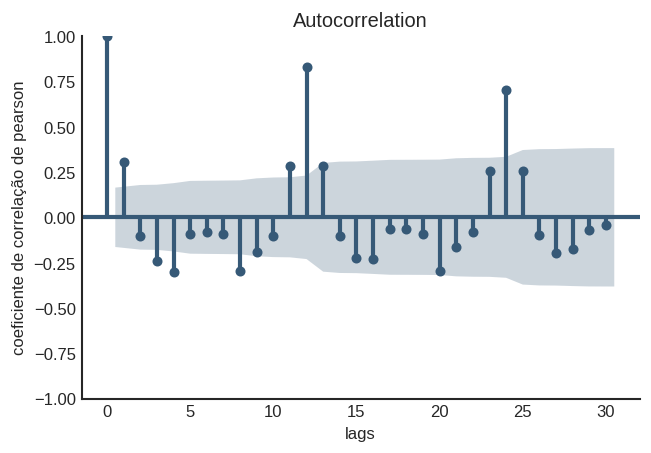

In [287]:
# Plot autocorrelation
plot_acf(dfnew['diff_1'], lags=30);
plt.xlabel('lags');
plt.ylabel('coeficiente de correlação de pearson');
plt.show();

## Partial autocorrelation
https://towardsdatascience.com/time-series-from-scratch-autocorrelation-and-partial-autocorrelation-explained-1dd641e3076f


This one is a bit tougher to understand. It does the same as regular autocorrelation — shows the correlation of a sequence with itself lagged by some number of time units. But there’s a twist. Only the direct effect is shown, and all intermediary effects are removed.


For example, you want to know the direct relationship between the number of passengers today and 12 months ago. You don’t care about anything in between.

In [284]:
# Calculate partial autocorrelation
pacf_values = pacf(dfnew['diff_1'])

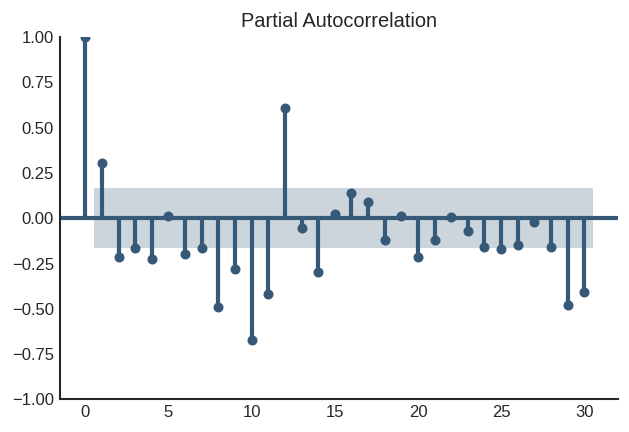

In [286]:
# Plot partial autocorrelation
plot_pacf(dfnew['diff_1'], lags=30);